# Hausaufgabe 5 

## Integration einer Bewegungsgleichung: Freier Fall - Wiederholung

In dieser Aufgabe werden wir erneut die Bewegungsgleichung des freien Falls numerisch mit dem Euler Verfahren lösen. Die Bewegungsgleichung hat die Form:
\begin{equation}\tag{1}
 \ddot x = \frac{\mathrm{d}^2x}{\mathrm{d}t^2}= a
\end{equation}

Dieses Mal soll die Bewegungsgleichung nicht "per Hand" sondern rekursiv mittels einer Schleife gelöst werden. 

## 1. Integration mit Schleife

**a)** Lösen Sie erneut Gleichung (1) für fünf Zeitschritte $\Delta t = 0.1$, indem Sie die Gleichungen (3) und (4) für die Anfangswerte $x_0=x\left(t=0\right) = 2$ und $v_0=v\left(t=0\right) = 1$ numerisch mit Hilfe einer Schleife integrieren. Dabei soll $a=-9.81$ sein. Speichern Sie die numerisch berechneten Positionen in einer Liste indem Sie `append()` benutzen.

Als Erinerrung:

\begin{equation} \tag{2}
x\!\left( t \right) = x_0 + v_0 t + \frac{1}{2} a t^2.
\end{equation}

\begin{align}\tag{3}
        x\left(t+\Delta t \right) &= x\left(t\right) + v\left(t\right) \Delta t \\ 
        v\left(t+\Delta t \right) &= v\left(t\right) + a\Delta t \tag{4}
    \end{align}
    


In [1]:
import numpy as np

x = 2
v = 1
a = -9.81
Dt = 0.1
Dv = a*Dt
resultsx = [2]
resultsv = [1]
for i in range(4):
    x = x + v*Dt
    resultsx.append(x)
    v = v + Dv
    resultsv.append(v)
    
    
print(resultsx)
print(resultsv)




[2, 2.1, 2.1019, 2.0057, 1.8114]
[1, 0.018999999999999906, -0.9620000000000002, -1.9430000000000003, -2.9240000000000004]


**b)** Plotten Sie diese Positionen in einem Diagramm mit der Bahnkurve (Gleichung (2)). Benutzen Sie das mit `ax.scatter()` erweiterte Grundgerüst von der Musterlösung `helpPlotScatter.ipynb`. 

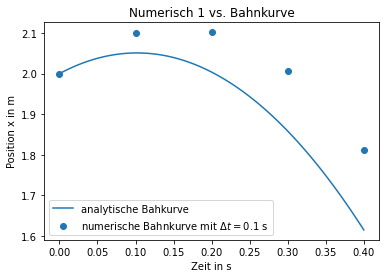

In [2]:
#Plotten

import matplotlib.pyplot as plt
import numpy as np

tb = np.linspace(0, 0.4, 75)

def Bahnkurve(tb):
    x0 = 2
    v0 = 1
    a = -9.81
    x = x0+ v0*tb +0.5*a*tb**2
    return x

t = np.array([0, 0.1, 0.2, 0.3, 0.4])
x1 = np.array([2, 2.1, 2.1019, 2.0057, 1.8114])

fig, ax = plt.subplots()

ax.plot(tb, Bahnkurve(tb), label='analytische Bahkurve')
ax.scatter(t, x1, label=r'numerische Bahnkurve mit $\Delta t = 0.1$ s')

ax.set_title('Numerisch 1 vs. Bahnkurve')
ax.set_xlabel('Zeit in s')
ax.set_ylabel('Position x in m')

ax.legend()

plt.show()

## 2. Variation des Zeitschrittes

Sie sollten nun die Abbildung aus Hausaufgabe 3 reproduziert haben

**a)** Wiederholen Sie Aufgabe 1 mit einem Zeitschritt $\Delta t = 0.005$. Achten Sie darauf, dass die Integrationszeit gleich bleibt! Da Sie nun sehr viele Werte erzeugt haben, ist es sinnvoller die numerische Lösung ebenfalls in einem Linienplot mit `ax.plot()` darzustellen.

In [11]:
x = 2
a = -9.81
Dt = 0.005
Dv = a*Dt
resultsx = [2]
resultsv = [1]
for i in range(80):
    v = i*a*Dt + 1
    resultsv.append(v)
    x = x + v*Dt
    resultsx.append(x)


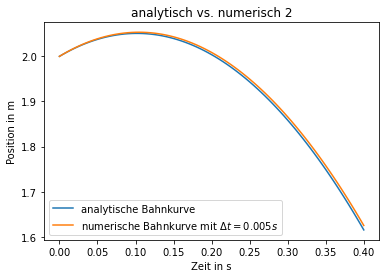

In [12]:
import matplotlib.pyplot as plt
import numpy as np


t1 = np.linspace(0, 0.4, 81)

def Bahkurve(t1):
    a = -9.81
    v0 = 1
    x0 = 2
    x = x0 + v0*t1+0.5*a*t1**2
    return(x)

x = resultsx
t2 = np.linspace(0, 0.4, 81)

fig, ax = plt.subplots()

ax.plot(t1, Bahkurve(t1), label='analytische Bahnkurve')
ax.plot(t2, x, label='numerische Bahnkurve mit $\Delta t = 0.005 s$')

ax.set_title('analytisch vs. numerisch 2')
ax.set_ylabel('Position in m')
ax.set_xlabel('Zeit in s')

ax.legend()
plt.show()

**b)** Berechnen Sie die quadratische Abweichung $\mathrm{SE}\left(t\right)$ zwischen der numerischen und analytischen Lösung abhängig vom Zeitschritt:
   $$ 
   \mathrm{SE}\left(t\right) = \left(x_{\mathrm{numerisch}}\left(t\right) - x_\mathrm{analytisch}\left(t\right)\right) ^2
   $$
Plotten Sie die quadratische Abweichung gegen die Zeit. Benutzen Sie geeignete Beschriftungen! 

Beschreiben Sie kurz, was Sie beobachten. 

In [13]:
analytisch = []

for i in np.linspace(0, 0.4, 81):
    a = Bahnkurve(i)
    analytisch.append(a)
    
#Werte für die Fehlerquadrate
SE = []

for i in range(81):
    se = (x[i]-analytisch[i])**2
    SE.append(se)



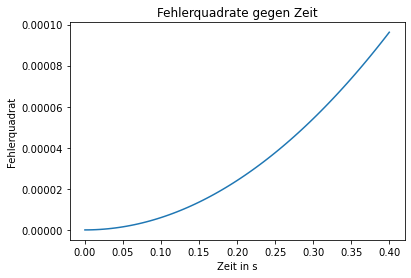

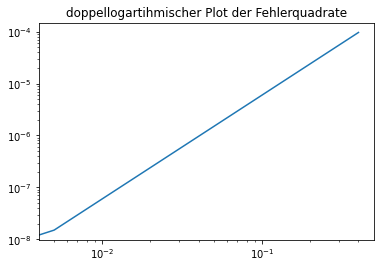

In [14]:
#Plot der Fehlerquadrate
import matplotlib.pyplot as plt

t = np.linspace(0, 0.4, 81)

fig, ax = plt.subplots()

ax.plot(t, SE)

ax.set_title('Fehlerquadrate gegen Zeit')
ax.set_xlabel('Zeit in s')
ax.set_ylabel('Fehlerquadrat')
            
plt.show()

plt.loglog(t, SE)
plt.title("doppellogartihmischer Plot der Fehlerquadrate")
plt.show()

Antwort: Der Plot der Fehlerquadrate, der Quadrate der Differenz zweier Kurven, zeigt, dass die numerische Lösung der Bahnkurve mit zunehmender Zeit immer stärker von der analytischen Lösung abweicht, weil sich die Fehler addieren.
ABER: Diese Fehler sind aber fünf Größenordnungen kleiner als der eigentliche Messwert.